# Ray et al 2013 Intepretation
**Authorship:**
Adam Klie, *09/03/2022*
***
**Description:**
Notebook to interpret the trained models on the Ray et al (2013) dataset.
***

In [1]:
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

import os
import glob
import logging
import torch
import numpy as np
import pandas as pd
import eugene as eu
import matplotlib.pyplot as plt
import matplotlib
import logomaker as lm

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

Global seed set to 13


In [2]:
eu.settings.dataset_dir = "/cellar/users/aklie/data/eugene/ray13"
eu.settings.output_dir = "/cellar/users/aklie/projects/EUGENe/EUGENe_paper/output/ray13"
eu.settings.logging_dir = "/cellar/users/aklie/projects/EUGENe/EUGENe_paper/logs/ray13"
eu.settings.config_dir = "/cellar/users/aklie/projects/EUGENe/EUGENe_paper/configs/ray13"
eu.settings.figure_dir = "/cellar/users/aklie/projects/EUGENe/EUGENe_paper/figures/ray13"

# Load the test `SeqData`

In [3]:
# Load in the test data with all the sequences
sdata_test = eu.dl.read_h5sd(os.path.join(eu.settings.dataset_dir, "norm_setB_processed_ST.h5sd"))
target_mask = sdata_test.seqs_annot.columns.str.contains("RNCMPT")
target_cols = sdata_test.seqs_annot.columns[target_mask]

In [4]:
# Get the MT training labels
sdata_training = eu.dl.read_h5sd(os.path.join(eu.settings.dataset_dir, eu.settings.dataset_dir, "norm_setA_sub_MT.h5sd"))
target_mask_MT = sdata_training.seqs_annot.columns.str.contains("RNCMPT")
target_cols_MT = sdata_training.seqs_annot.columns[target_mask_MT]
del sdata_training

In [5]:
# Check the targets to make sure they are 244 and 233
len(target_cols), len(target_cols_MT)

(244, 233)

In [7]:
# Load in top 10 single task models
top_ST_tasks = pd.read_csv(os.path.join(eu.settings.output_dir, "top_10_ST_intensities.tsv"), sep="\t", index_col=0)

In [8]:
# Load in the top 10 multitask models
top_MT_tasks = pd.read_csv(os.path.join(eu.settings.output_dir, "top_10_MT_intensities.tsv"), sep="\t", index_col=0)

In [9]:
# Get the shared index
shared_top_10 = sorted(top_ST_tasks.index.intersection(top_MT_tasks.index))
shared_top_10

['RNCMPT00023',
 'RNCMPT00205',
 'RNCMPT00215',
 'RNCMPT00238',
 'RNCMPT00246',
 'RNCMPT00268',
 'RNCMPT00269']

In [9]:
# Get the indeces of the shared cols in the MT target cols
shared_top_10_MT_idx = np.where(target_cols_MT.isin(shared_top_10))[0]
shared_top_10_MT_idx

array([ 19, 172, 176, 194, 199, 215, 216])

# Feature Attribution

## Single task models

In [60]:
# Get per nuceotide feature attibutions
for i, target_col in enumerate(shared_top_10):
    print(f"Intepreting DeepBind SingleTask model on {target_col}")
    model_file = glob.glob(os.path.join(eu.settings.logging_dir, "DeepBind_ST", target_col, "checkpoints", "*"))[0]
    model = eu.models.DeepBind.load_from_checkpoint(model_file)
    eu.interpret.feature_attribution_sdata(
        model,
        sdata_test,
        method="InputXGradient",
        suffix=f"_{target_col}_ST"
    )

Intepreting DeepBind SingleTask model on RNCMPT00023
False
No transforms given, assuming just need to tensorize.


Computing saliency on batches of size 128:   0%|          | 0/945 [00:00<?, ?it/s]

Intepreting DeepBind SingleTask model on RNCMPT00205
False
No transforms given, assuming just need to tensorize.


Computing saliency on batches of size 128:   0%|          | 0/945 [00:00<?, ?it/s]

Intepreting DeepBind SingleTask model on RNCMPT00215
False
No transforms given, assuming just need to tensorize.


Computing saliency on batches of size 128:   0%|          | 0/945 [00:00<?, ?it/s]

Intepreting DeepBind SingleTask model on RNCMPT00238
False
No transforms given, assuming just need to tensorize.


Computing saliency on batches of size 128:   0%|          | 0/945 [00:00<?, ?it/s]

Intepreting DeepBind SingleTask model on RNCMPT00246
False
No transforms given, assuming just need to tensorize.


Computing saliency on batches of size 128:   0%|          | 0/945 [00:00<?, ?it/s]

Intepreting DeepBind SingleTask model on RNCMPT00268
False
No transforms given, assuming just need to tensorize.


Computing saliency on batches of size 128:   0%|          | 0/945 [00:00<?, ?it/s]

Intepreting DeepBind SingleTask model on RNCMPT00269
False
No transforms given, assuming just need to tensorize.


Computing saliency on batches of size 128:   0%|          | 0/945 [00:00<?, ?it/s]

## Multi-task

In [61]:
version = 0
model_file = glob.glob(os.path.join(eu.settings.logging_dir, "DeepBind_MT", f"v{version}", "checkpoints", "*"))[0]
model = eu.models.DeepBind.load_from_checkpoint(model_file)
for i, target_col in zip(shared_top_10_MT_idx, shared_top_10):
    print(f"Intepreting version{version} DeepBind MultiTask model on {target_col}, which is the {i}th index of prediction")
    eu.interpret.feature_attribution_sdata(
        model,
        sdata_test,
        method="InputXGradient",
        target=int(i),
        suffix=f"_{target_col}_MT"
    )

Intepreting version0 DeepBind MultiTask model on RNCMPT00023, which is the 19th index of prediction
False
No transforms given, assuming just need to tensorize.


Computing saliency on batches of size 128:   0%|          | 0/945 [00:00<?, ?it/s]

Intepreting version0 DeepBind MultiTask model on RNCMPT00205, which is the 172th index of prediction
False
No transforms given, assuming just need to tensorize.


Computing saliency on batches of size 128:   0%|          | 0/945 [00:00<?, ?it/s]

Intepreting version0 DeepBind MultiTask model on RNCMPT00215, which is the 176th index of prediction
False
No transforms given, assuming just need to tensorize.


Computing saliency on batches of size 128:   0%|          | 0/945 [00:00<?, ?it/s]

Intepreting version0 DeepBind MultiTask model on RNCMPT00238, which is the 194th index of prediction
False
No transforms given, assuming just need to tensorize.


Computing saliency on batches of size 128:   0%|          | 0/945 [00:00<?, ?it/s]

Intepreting version0 DeepBind MultiTask model on RNCMPT00246, which is the 199th index of prediction
False
No transforms given, assuming just need to tensorize.


Computing saliency on batches of size 128:   0%|          | 0/945 [00:00<?, ?it/s]

Intepreting version0 DeepBind MultiTask model on RNCMPT00268, which is the 215th index of prediction
False
No transforms given, assuming just need to tensorize.


Computing saliency on batches of size 128:   0%|          | 0/945 [00:00<?, ?it/s]

Intepreting version0 DeepBind MultiTask model on RNCMPT00269, which is the 216th index of prediction
False
No transforms given, assuming just need to tensorize.


Computing saliency on batches of size 128:   0%|          | 0/945 [00:00<?, ?it/s]

## Plot feature attributions 

Plotting feature attribution scores for DeepBind models on RNCMPT00023


Importance values: 0it [00:00, ?it/s]

Plotting feature attribution scores for DeepBind models on RNCMPT00205


Importance values: 0it [00:00, ?it/s]

Plotting feature attribution scores for DeepBind models on RNCMPT00215


Importance values: 0it [00:00, ?it/s]

Plotting feature attribution scores for DeepBind models on RNCMPT00238


Importance values: 0it [00:00, ?it/s]

Plotting feature attribution scores for DeepBind models on RNCMPT00246


Importance values: 0it [00:00, ?it/s]

Plotting feature attribution scores for DeepBind models on RNCMPT00268


Importance values: 0it [00:00, ?it/s]

Plotting feature attribution scores for DeepBind models on RNCMPT00269


Importance values: 0it [00:00, ?it/s]

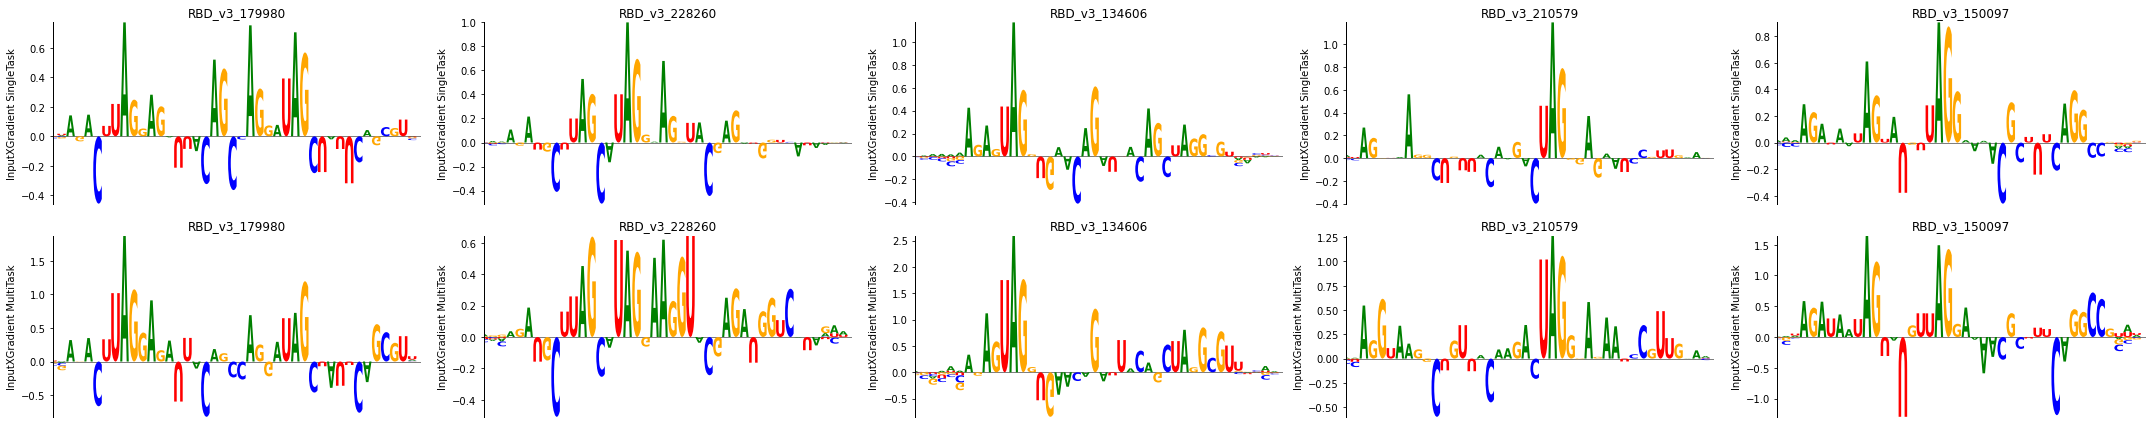

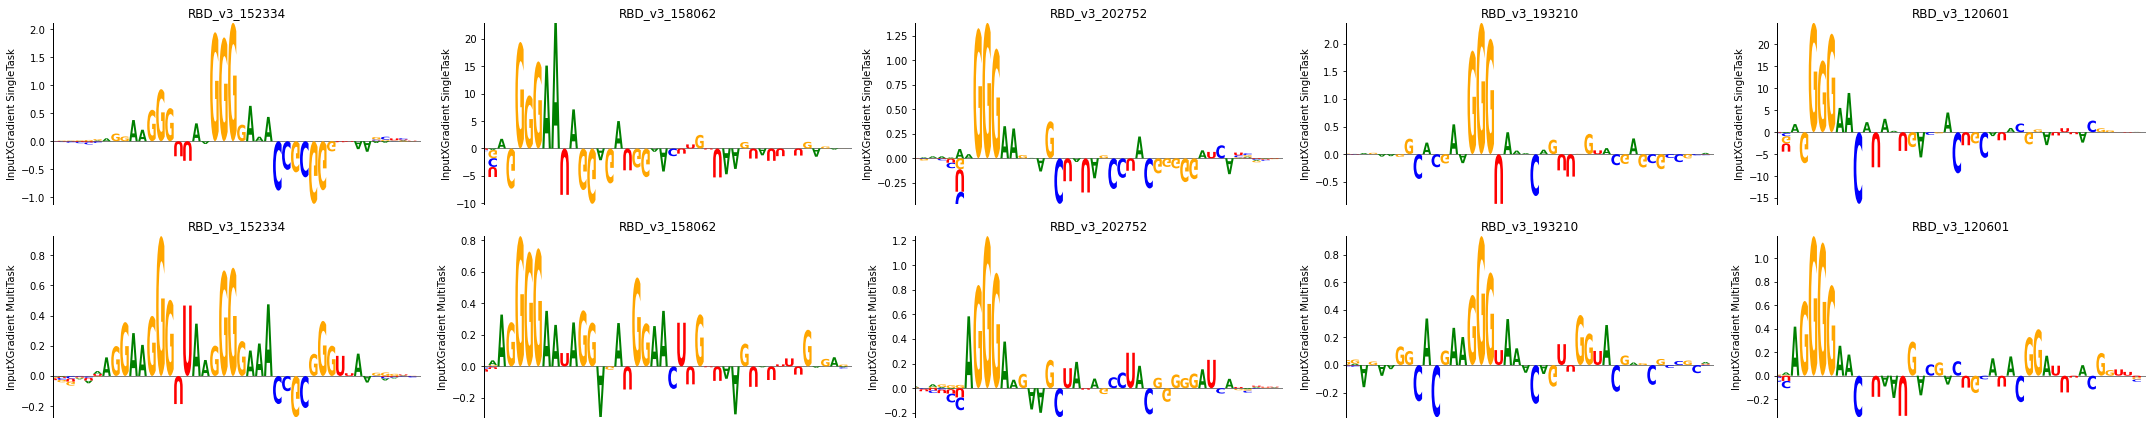

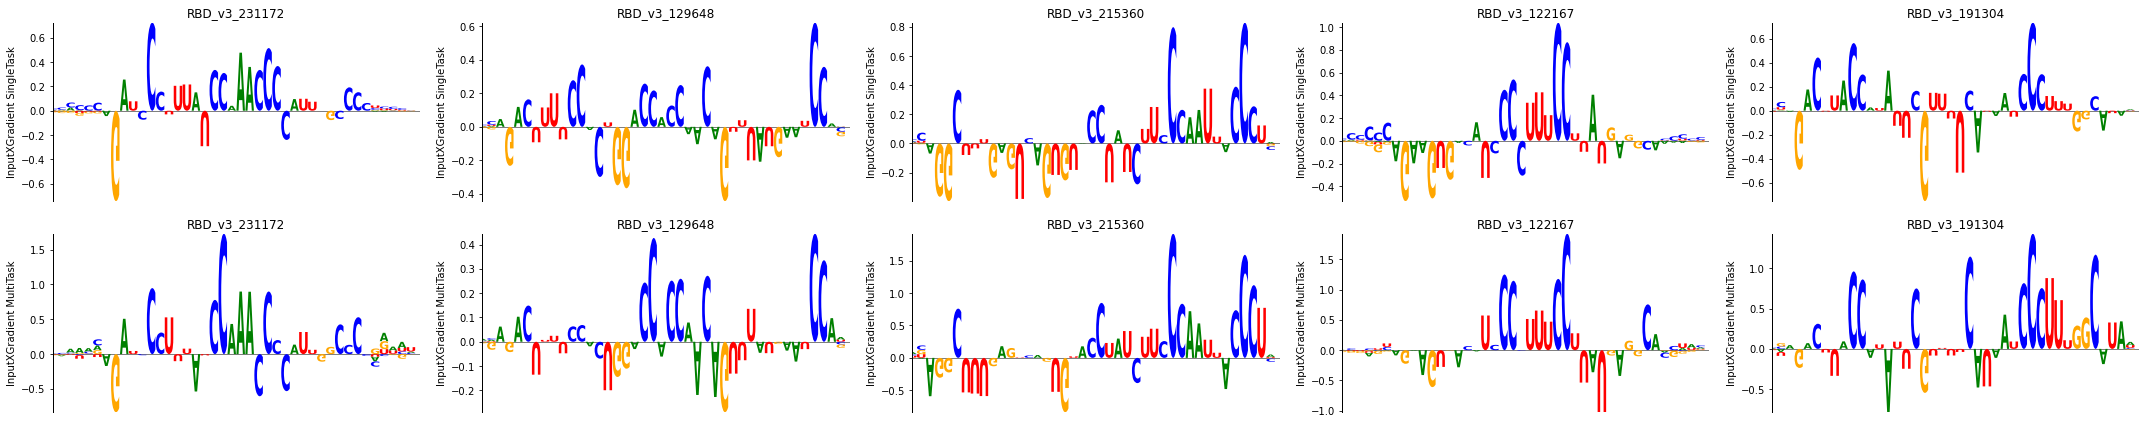

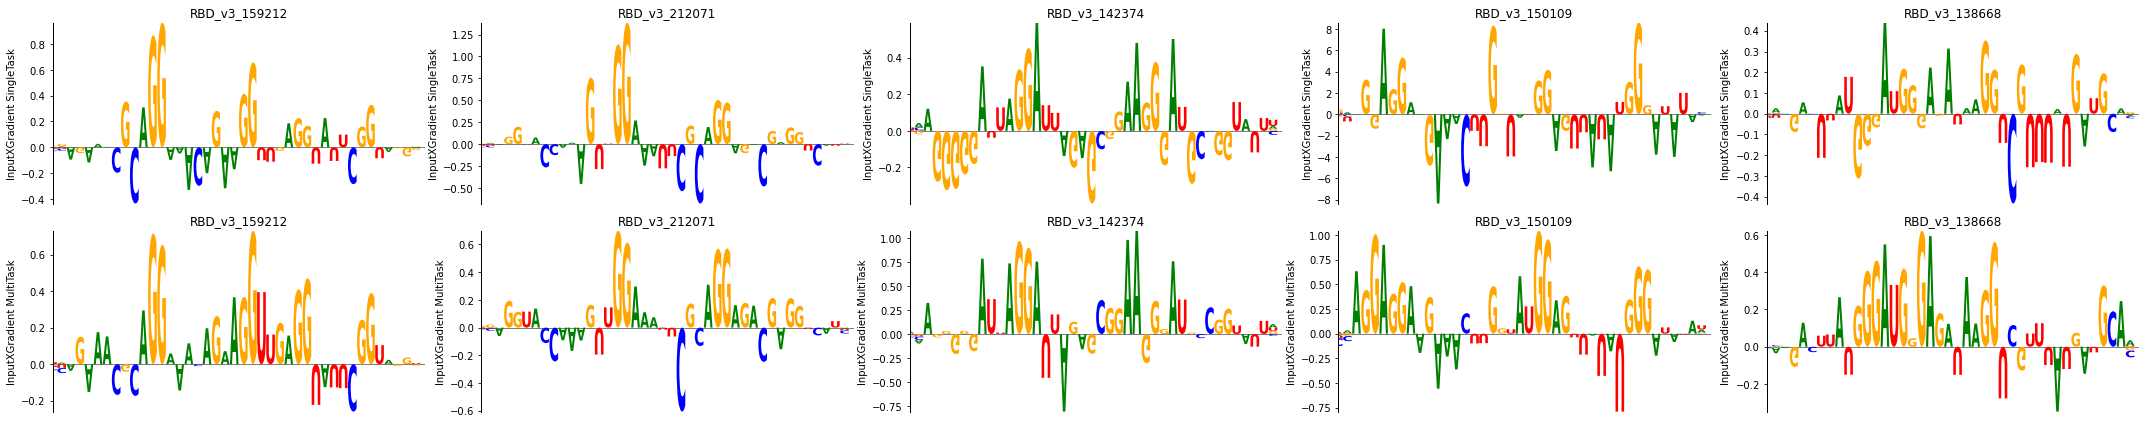

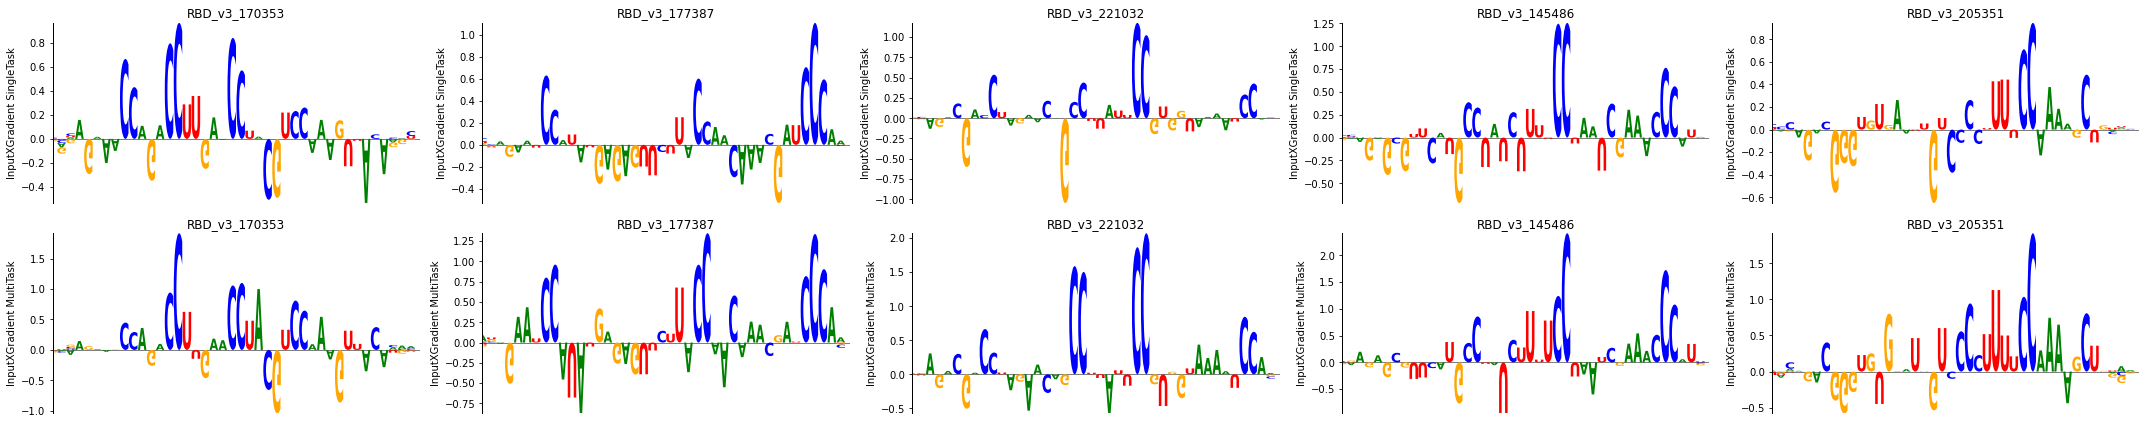

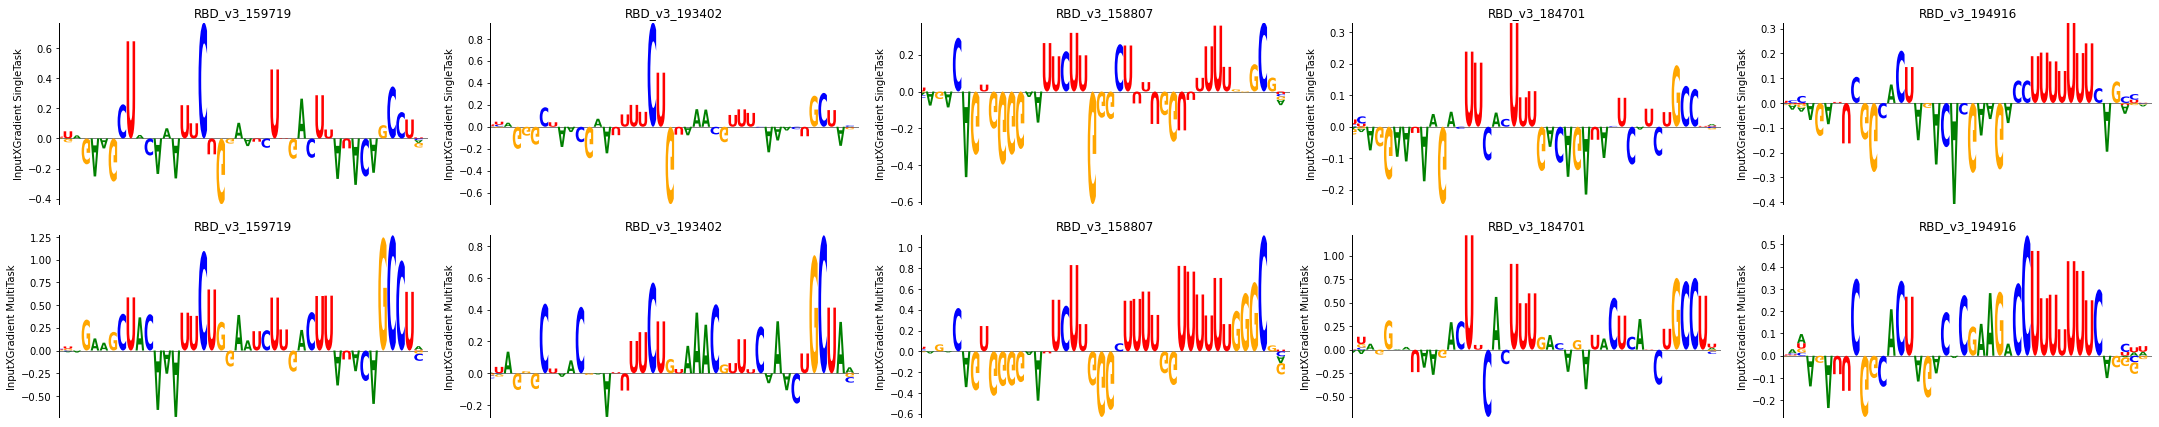

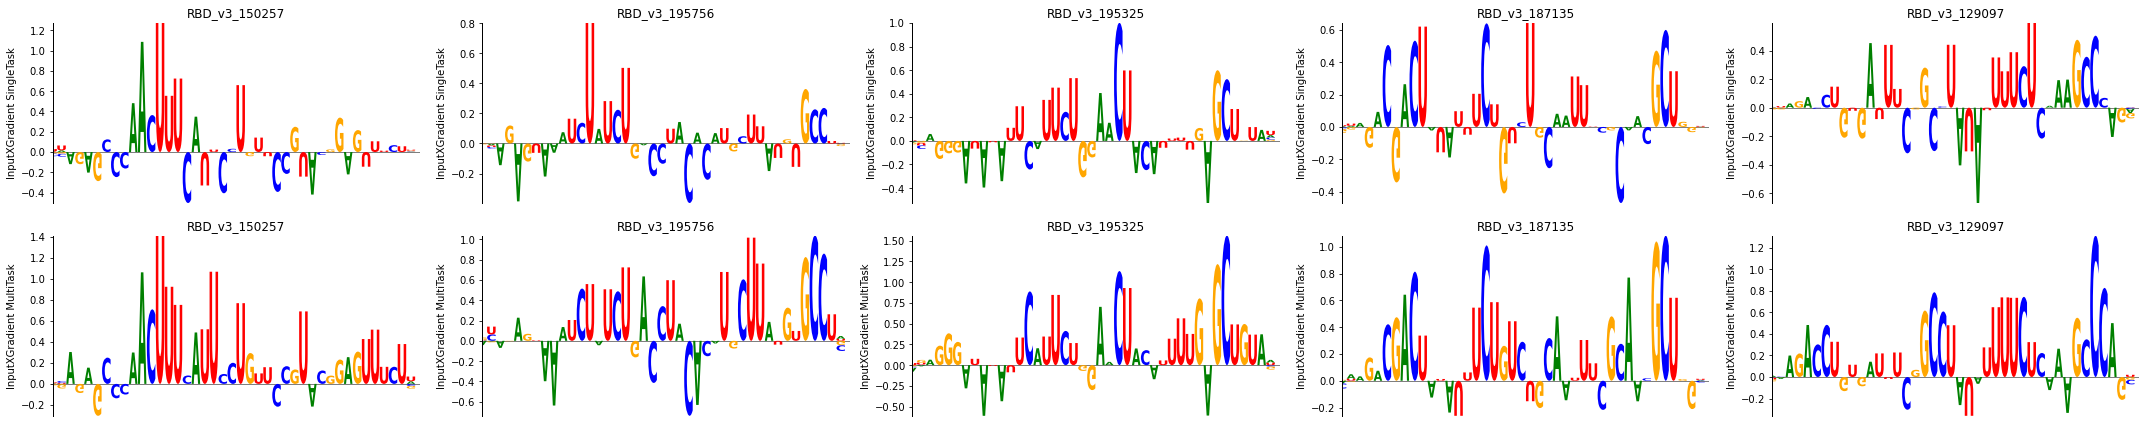

In [62]:
for i, target_col in enumerate(shared_top_10):
    print(f"Plotting feature attribution scores for DeepBind models on {target_col}")
    top5_index = sdata_test[target_col].sort_values(ascending=False).index[:5]
    eu.pl.lm_multiseq_track(
        sdata_test,
        seq_ids=top5_index,
        uns_keys=[f"InputXGradient_imps_{target_col}_ST", f"InputXGradient_imps_{target_col}_MT"],
        alphabet="RNA",
        width=30,
        height=6,
        ylabels=["InputXGradient SingleTask", "InputXGradient MultiTask"],
        save=os.path.join(eu.settings.figure_dir, "feature_attr", f"model_top5_feature_attr_{target_col}_STandMT.pdf")
    )
    #plt.close()

# Filter viz

## Single task 

In [68]:
# Grab the pfms for the 16 filters of each single task model
for i, target_col in enumerate(shared_top_10):
    print(f"Generating pfms for single task DeepBind models on {target_col}")
    model_file = glob.glob(os.path.join(eu.settings.logging_dir, "DeepBind_ST", target_col, "checkpoints", "*"))[0]
    model = eu.models.DeepBind.load_from_checkpoint(model_file)
    eu.interpret.generate_pfms_sdata(
        model=model, 
        sdata=sdata_test,
        method="Alipahani15",
        threshold=0.75,
        batch_size=2048,
        vocab="RNA",
        key_name=f"pfms_{target_col}_ST"
    )

Generating pfms for single task DeepBind models on RNCMPT00023
No transforms given, assuming just need to tensorize.


Getting maximial activating seqlets:   0%|          | 0/59 [00:00<?, ?it/s]

Getting filter activators for 32 filters:   0%|          | 0/32 [00:00<?, ?it/s]

Getting PFMs from filters:   0%|          | 0/32 [00:00<?, ?it/s]

Generating pfms for single task DeepBind models on RNCMPT00205
No transforms given, assuming just need to tensorize.


Getting maximial activating seqlets:   0%|          | 0/59 [00:00<?, ?it/s]

Getting filter activators for 32 filters:   0%|          | 0/32 [00:00<?, ?it/s]

Getting PFMs from filters:   0%|          | 0/32 [00:00<?, ?it/s]

Generating pfms for single task DeepBind models on RNCMPT00215
No transforms given, assuming just need to tensorize.


Getting maximial activating seqlets:   0%|          | 0/59 [00:00<?, ?it/s]

Getting filter activators for 32 filters:   0%|          | 0/32 [00:00<?, ?it/s]

Getting PFMs from filters:   0%|          | 0/32 [00:00<?, ?it/s]

Generating pfms for single task DeepBind models on RNCMPT00238
No transforms given, assuming just need to tensorize.


Getting maximial activating seqlets:   0%|          | 0/59 [00:00<?, ?it/s]

Getting filter activators for 32 filters:   0%|          | 0/32 [00:00<?, ?it/s]

Getting PFMs from filters:   0%|          | 0/32 [00:00<?, ?it/s]

Generating pfms for single task DeepBind models on RNCMPT00246
No transforms given, assuming just need to tensorize.


Getting maximial activating seqlets:   0%|          | 0/59 [00:00<?, ?it/s]

Getting filter activators for 32 filters:   0%|          | 0/32 [00:00<?, ?it/s]

Getting PFMs from filters:   0%|          | 0/32 [00:00<?, ?it/s]

Generating pfms for single task DeepBind models on RNCMPT00268
No transforms given, assuming just need to tensorize.


Getting maximial activating seqlets:   0%|          | 0/59 [00:00<?, ?it/s]

Getting filter activators for 32 filters:   0%|          | 0/32 [00:00<?, ?it/s]

Getting PFMs from filters:   0%|          | 0/32 [00:00<?, ?it/s]

Generating pfms for single task DeepBind models on RNCMPT00269
No transforms given, assuming just need to tensorize.


Getting maximial activating seqlets:   0%|          | 0/59 [00:00<?, ?it/s]

Getting filter activators for 32 filters:   0%|          | 0/32 [00:00<?, ?it/s]

Getting PFMs from filters:   0%|          | 0/32 [00:00<?, ?it/s]

## Multitask

In [10]:
# Grab the pfms for all filters of the multitask model, this requires a lot of mem!
version = 0
model_file = glob.glob(os.path.join(eu.settings.logging_dir, "DeepBind_MT", f"v{version}", "checkpoints", "*"))[0]
model = eu.models.DeepBind.load_from_checkpoint(model_file)
eu.interpret.generate_pfms_sdata(
    model=model, 
    sdata=sdata_test,
    threshold=0.75, 
    method="Alipahani15",
    batch_size=2048,
    vocab="RNA",
    key_name=f"pfms_MT"
)

No transforms given, assuming just need to tensorize.


Getting maximial activating seqlets:   0%|          | 0/59 [00:00<?, ?it/s]

Getting filter activators for 1024 filters:   0%|          | 0/1024 [00:00<?, ?it/s]

Getting PFMs from filters:   0%|          | 0/1024 [00:00<?, ?it/s]

# Plot filter viz

Plotting and saving filter visualizations for DeepBind models on RNCMPT00023
Saved PWM File as : /cellar/users/aklie/projects/EUGENe/EUGENe_paper/output/ray13/RNCMPT00023_filters_0.75_ST.meme
Plotting and saving filter visualizations for DeepBind models on RNCMPT00205
Saved PWM File as : /cellar/users/aklie/projects/EUGENe/EUGENe_paper/output/ray13/RNCMPT00205_filters_0.75_ST.meme
Plotting and saving filter visualizations for DeepBind models on RNCMPT00215
Saved PWM File as : /cellar/users/aklie/projects/EUGENe/EUGENe_paper/output/ray13/RNCMPT00215_filters_0.75_ST.meme
Plotting and saving filter visualizations for DeepBind models on RNCMPT00238
Saved PWM File as : /cellar/users/aklie/projects/EUGENe/EUGENe_paper/output/ray13/RNCMPT00238_filters_0.75_ST.meme
Plotting and saving filter visualizations for DeepBind models on RNCMPT00246
Saved PWM File as : /cellar/users/aklie/projects/EUGENe/EUGENe_paper/output/ray13/RNCMPT00246_filters_0.75_ST.meme
Plotting and saving filter visualization

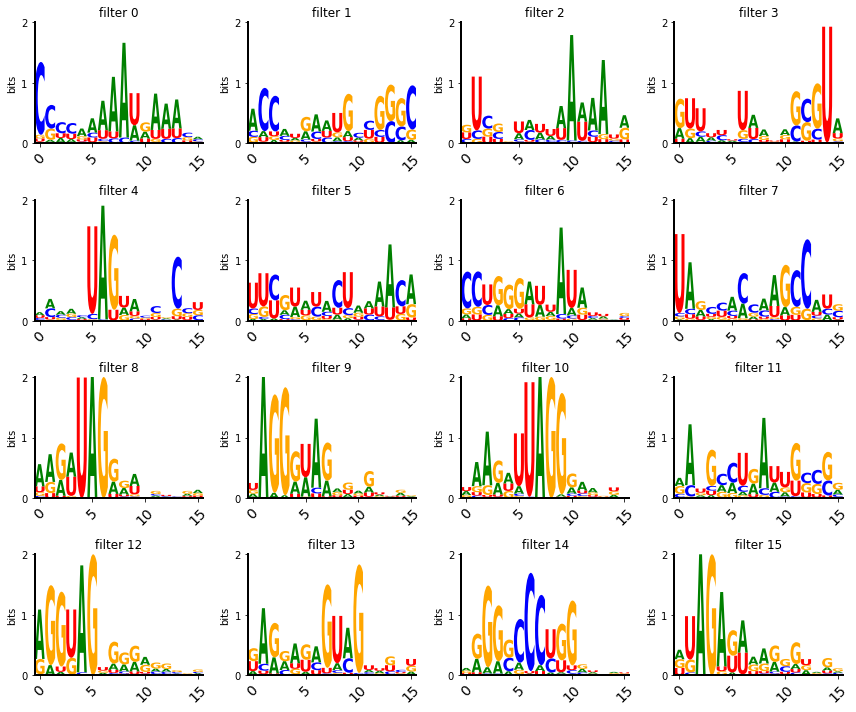

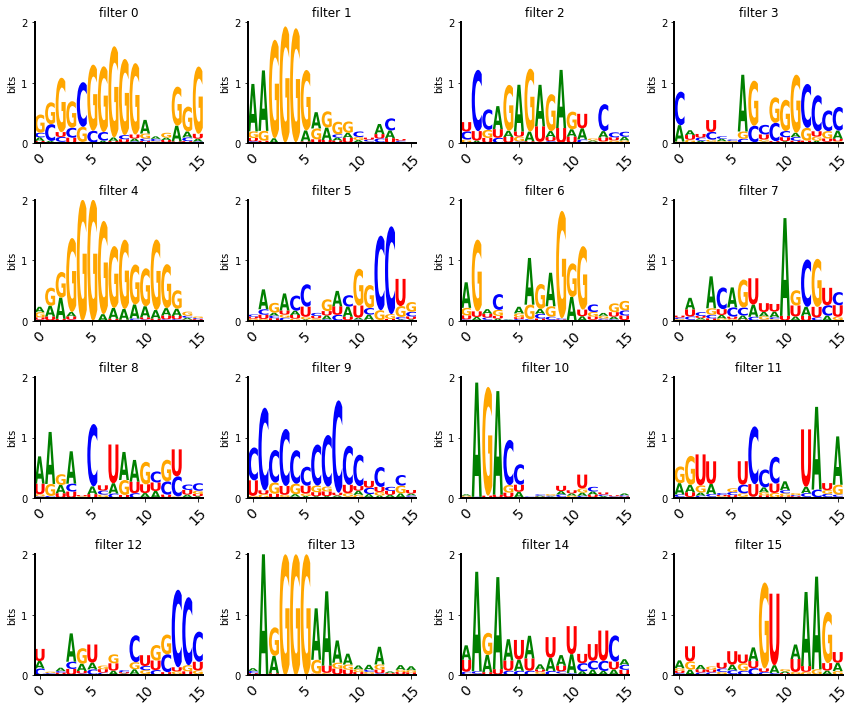

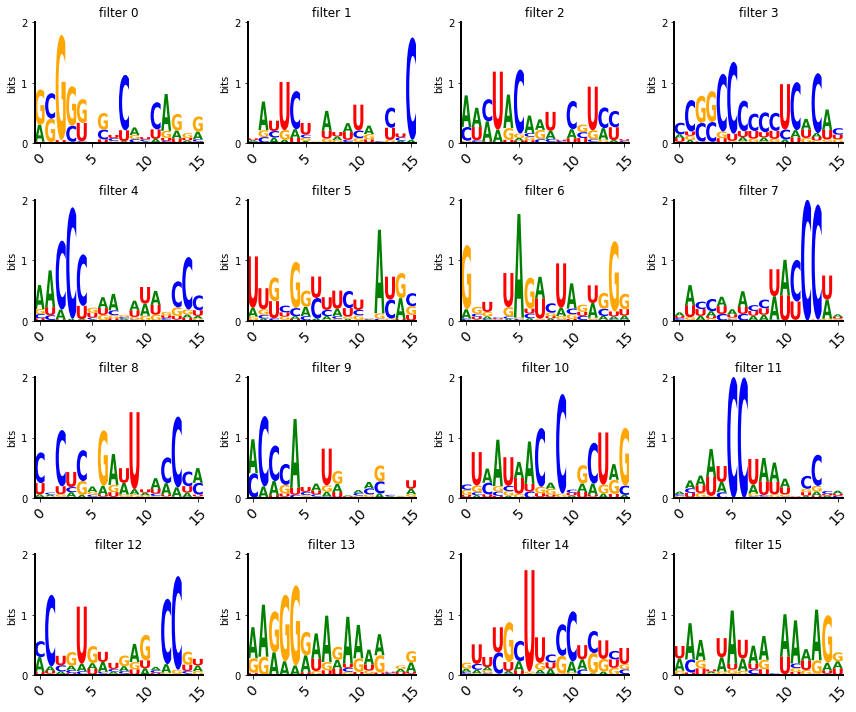

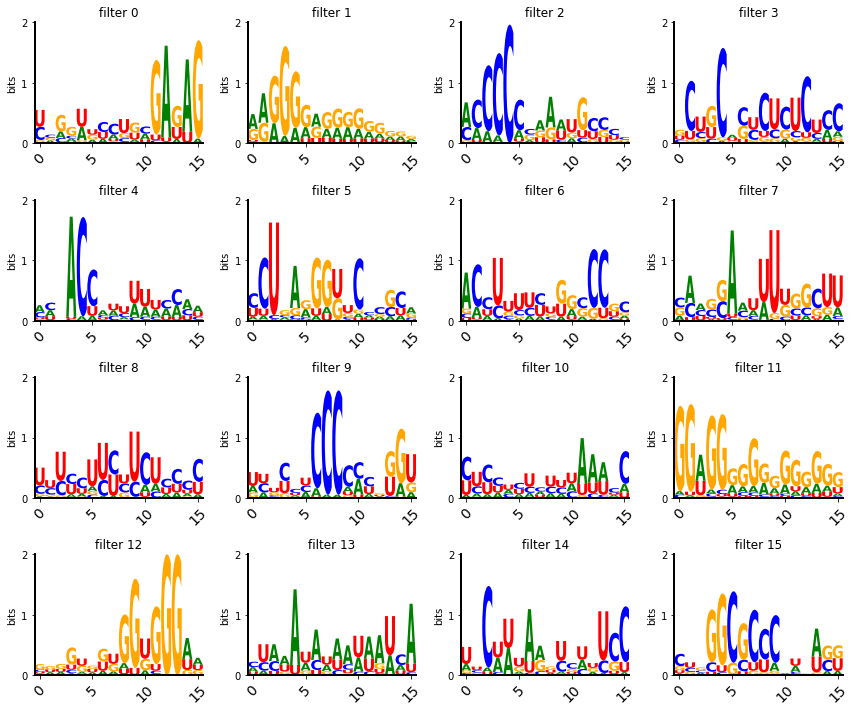

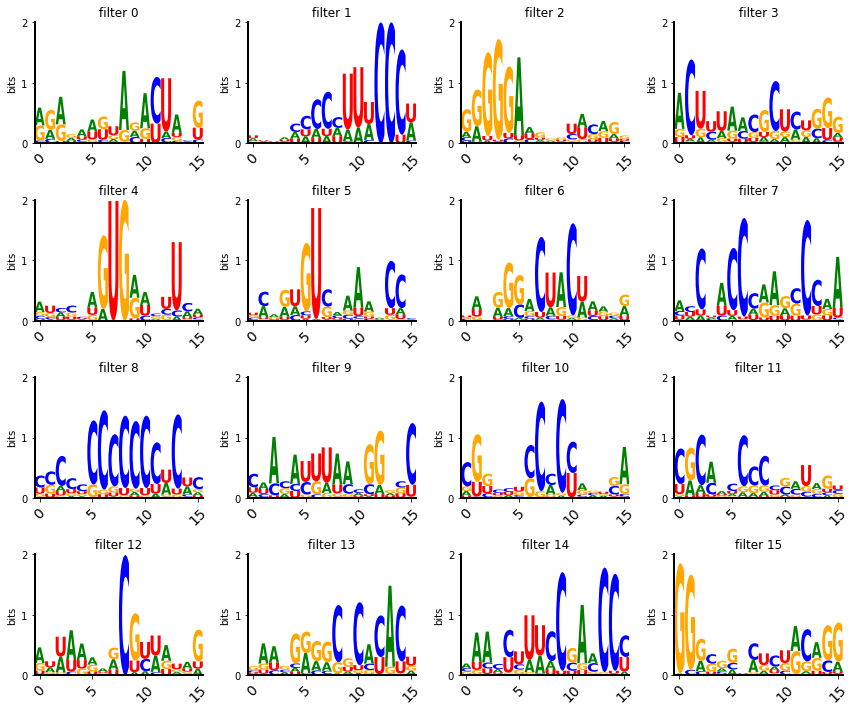

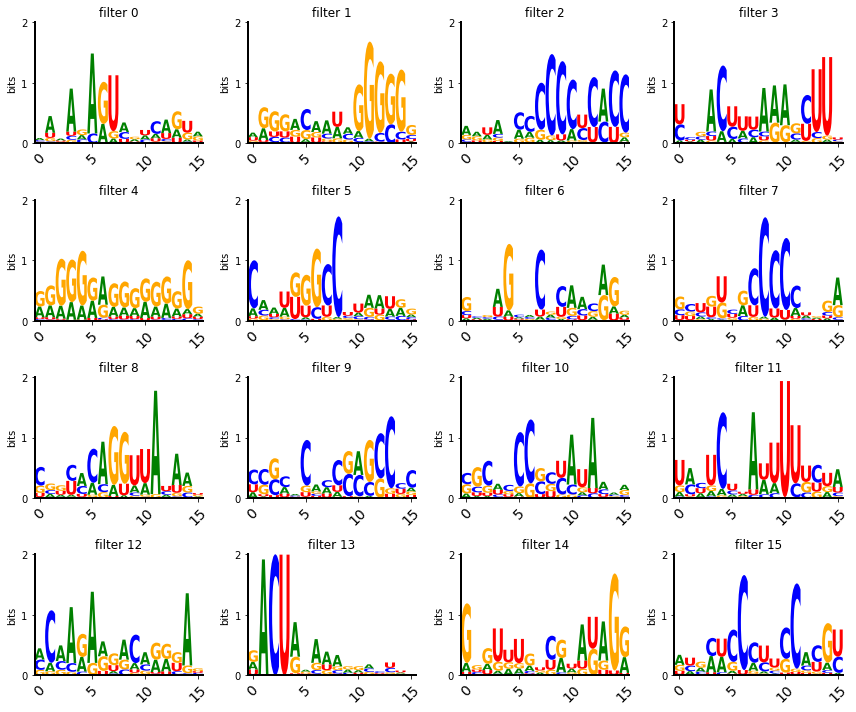

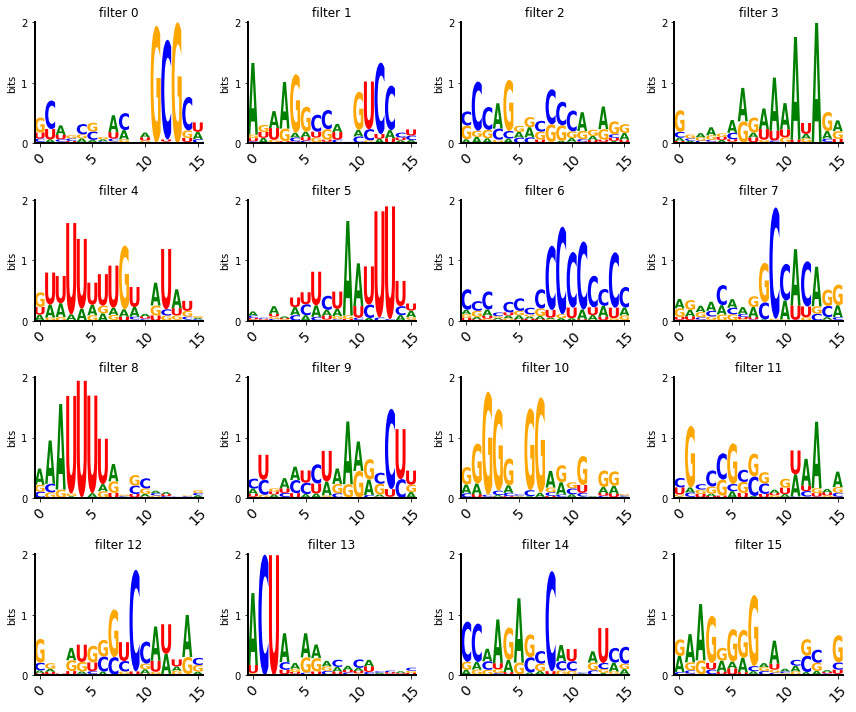

In [69]:
# Visualizations for all 16 filters for DeepBind SingleTask models
for i, target_col in enumerate(shared_top_10):
    print(f"Plotting and saving filter visualizations for DeepBind models on {target_col}")
    eu.pl.lm_multifilter_viz(
        sdata_test,
        filter_ids=range(0,16),
        uns_key=f"pfms_{target_col}_ST",
        titles=[f"filter {i}" for i in range(16)],
        num_rows=4,
        num_cols=4,
        save=os.path.join(eu.settings.figure_dir, "filter_viz", f"filters_viz_{target_col}_0.75_ST.pdf")
    )

    # Save all the filter pfms from above as meme format for submission to TomTom
    eu.dl.motif.filters_to_meme_sdata(
        sdata_test,
        uns_key=f"pfms_{target_col}_ST", 
        vocab="RNA",
        output_dir=os.path.join(eu.settings.output_dir),
        file_name=f"{target_col}_filters_0.75_ST.meme"
    )
    #plt.close()

In [11]:
# Visualizations for all filters of the multitask model
for i in range(32):
    start_filter = i*32
    end_filter = (i*32) + 32
    print(f"Plotting and saving filters {start_filter+1}-{end_filter}")
    eu.pl.lm_multifilter_viz(
        sdata_test,
        filter_ids=list(sdata_test.uns["pfms_MT"].keys())[start_filter:end_filter],
        num_rows=8,
        num_cols=4,
        uns_key="pfms_MT",
        titles=[f"filter {i}" for i in range(start_filter, end_filter)],
        save=os.path.join(eu.settings.figure_dir, "filter_viz", f"filters{start_filter+1}-{end_filter}_viz_MT.pdf")
    )
    plt.tight_layout()
    plt.close()

Plotting and saving filters 1-32
Plotting and saving filters 33-64
Plotting and saving filters 65-96
Plotting and saving filters 97-128
Plotting and saving filters 129-160
Plotting and saving filters 161-192
Plotting and saving filters 193-224
Plotting and saving filters 225-256
Plotting and saving filters 257-288
Plotting and saving filters 289-320
Plotting and saving filters 321-352
Plotting and saving filters 353-384
Plotting and saving filters 385-416
Plotting and saving filters 417-448
Plotting and saving filters 449-480
Plotting and saving filters 481-512
Plotting and saving filters 513-544
Plotting and saving filters 545-576
Plotting and saving filters 577-608
Plotting and saving filters 609-640
Plotting and saving filters 641-672
Plotting and saving filters 673-704
Plotting and saving filters 705-736
Plotting and saving filters 737-768
Plotting and saving filters 769-800
Plotting and saving filters 801-832
Plotting and saving filters 833-864
Plotting and saving filters 865-896


In [13]:
# Save all the filter pfms from above as meme format for submission to TomTom
eu.dl.motif.filters_to_meme_sdata(
    sdata_test,
    uns_key=f"pfms_MT", 
    vocab="RNA",
    output_dir=os.path.join(eu.settings.output_dir),
    file_name=f"filters_0.75_MT.meme"
)

Saved PWM File as : /cellar/users/aklie/projects/EUGENe/EUGENe_paper/output/ray13/filters_0.75_MT.meme


# In silico

In [25]:
# Load the ST model for an RBP of interest
rbp = shared_top_10[4]
model_file = glob.glob(os.path.join(eu.settings.logging_dir, "DeepBind_ST", "checkpoints", "*"))[0]
model = eu.models.DeepBind.load_from_checkpoint(model_file)
model.eval()

DeepBind(
  (hp_metric): R2Score()
  (convnet): BasicConv1D(
    (module): Sequential(
      (0): Conv1d(4, 32, kernel_size=(16,), stride=(1,))
      (1): ReLU()
      (2): Dropout(p=0.25, inplace=False)
      (3): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (max_pool): MaxPool1d(kernel_size=26, stride=26, padding=0, dilation=1, ceil_mode=False)
  (avg_pool): AvgPool1d(kernel_size=(26,), stride=(26,), padding=(0,))
  (fcn): BasicFullyConnectedModule(
    (module): Sequential(
      (0): Linear(in_features=64, out_features=64, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.25, inplace=False)
      (3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (4): Linear(in_features=64, out_features=1, bias=True)
    )
  )
)

In [26]:
# Evolve a set of 10 random sequences across 5 rounds
random_seqs = eu.pp.ohe_seqs(eu.utils.random_seqs(10, 41))
X_random = torch.Tensor(random_seqs)
evolved_seqs = []
mutation_pos = []
for random_seq in random_seqs:
    evolved_res = eu.interpret.evolution(
        model=model,
        X=random_seq,
        rounds=5,
    )
    evolved_seqs.append(evolved_res[0])
    mutation_pos.append(evolved_res[2])
X_evolved = torch.Tensor(np.array(evolved_seqs))
mutation_pos = np.array(mutation_pos)

One-hot encoding sequences:   0%|          | 0/10 [00:00<?, ?it/s]

In [27]:
# Get the scores and the feature attributions for both the original random and the evolved
random_scores = model(X_random)
random_explains = eu.interpret.nn_explain(
    model=model,
    inputs=(X_random, X_random),
    saliency_type="InputXGradient",
)
evolved_scores = model(X_evolved)
evolved_explains = eu.interpret.nn_explain(
    model=model,
    inputs=(X_evolved, X_evolved),
    saliency_type="InputXGradient",
)

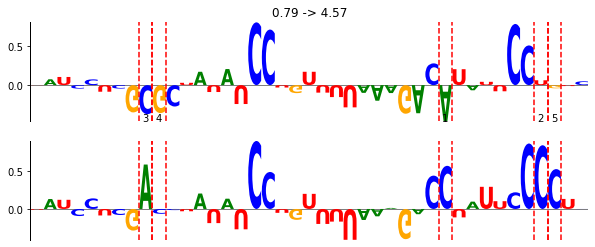

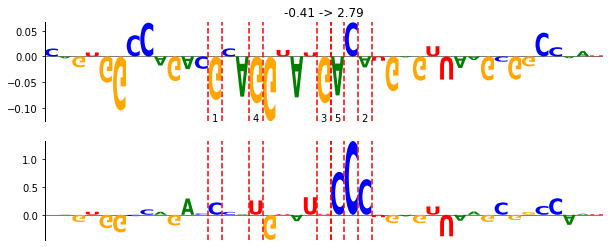

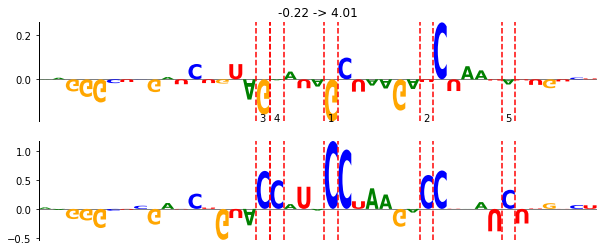

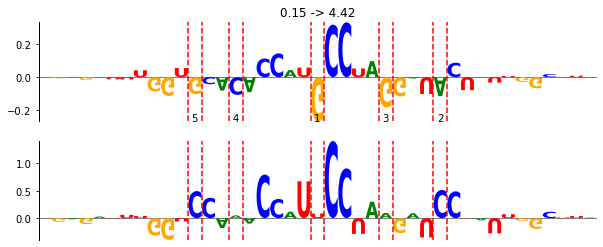

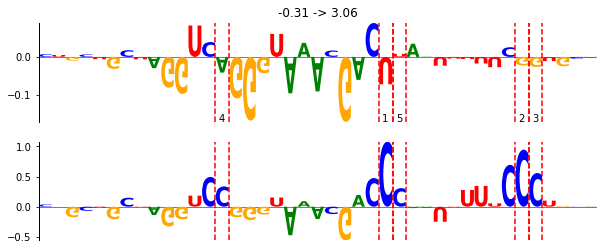

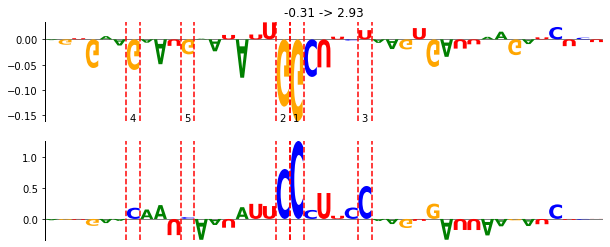

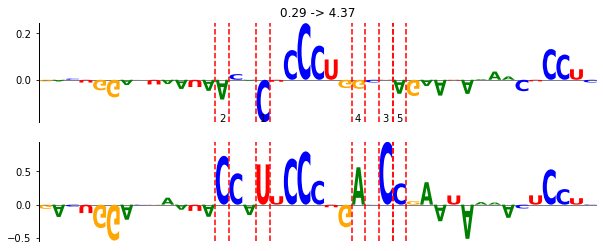

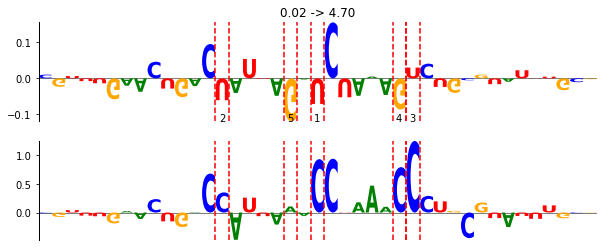

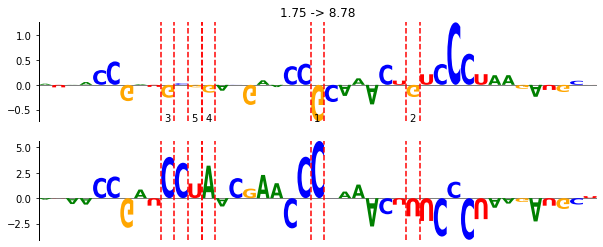

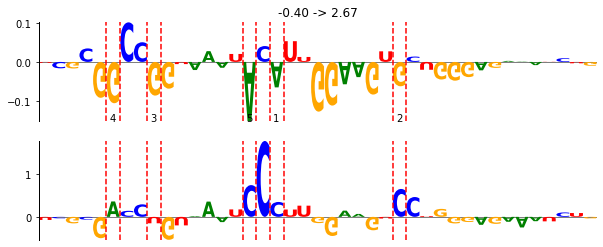

In [31]:
# Complicated plotting that we will eventually turn into a built in function
for i in range(len(random_explains)):
    fig, ax = plt.subplots(2, 1, figsize=(10, 4))
    random_viz_seq = pd.DataFrame(random_explains[i].T, columns=["A", "C", "G", "U"])
    random_viz_seq.index.name = "pos"
    random_logo = lm.Logo(random_viz_seq, color_scheme="classic", figsize=(10, 2), ax=ax[0])
    random_logo.style_spines(visible=False)
    random_logo.style_spines(spines=['left'], visible=True)
    random_logo.ax.set_xticks([])
    ax[0].vlines(mutation_pos[i]-0.5, 0, 1, transform=ax[0].get_xaxis_transform(), colors='r', linestyle='--')
    ax[0].vlines(mutation_pos[i]+0.5, 0, 1, transform=ax[0].get_xaxis_transform(), colors='r', linestyle='--')
    ax[0].set_title(f"{random_scores[i].item():.2f} -> {evolved_scores[i].item():.2f}")
    ax_bottom = ax[0].get_ylim()[0]
    for j in range(len(mutation_pos[i])):
        ax[0].annotate(f"{j+1}", xy=(mutation_pos[i][j]-0.25, ax_bottom))
    evolved_viz_seq = pd.DataFrame(evolved_explains[i].T, columns=["A", "C", "G", "U"])
    evolved_viz_seq.index.name = "pos"
    evolved_logo = lm.Logo(evolved_viz_seq, color_scheme="classic", figsize=(10, 2), ax=ax[1])
    evolved_logo.style_spines(visible=False)
    evolved_logo.style_spines(spines=['left'], visible=True)
    evolved_logo.ax.set_xticks([])
    ax[1].vlines(mutation_pos[i]-0.5, 0, 1, transform=ax[1].get_xaxis_transform(), colors='r', linestyle='--')
    ax[1].vlines(mutation_pos[i]+0.5, 0, 1, transform=ax[1].get_xaxis_transform(), colors='r', linestyle='--')
    plt.savefig(os.path.join(eu.settings.figure_dir, "ise", f"randseq{i}_evolution_{rbp}.pdf"))

# Save

In [ ]:
# Save the SeqData with predictions and interpretations
sdata_test.write_h5sd(os.path.join(eu.settings.output_dir, "norm_test_predictions_and_intepretations_MTfiltersonly_0.75.h5sd"))
#sdata_test.write_h5sd(os.path.join(eu.settings.output_dir, "norm_test_predictions_and_intepretations_noMTfilters_0.75.h5sd"))

---

# Scratch